In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


data = {}

def importData(filename):

    f = open(filename, "r")
    temperature = float(f.readline().strip("Temperature "))
    df = pd.read_csv(filename, skiprows=1)
    return temperature, df

for i in range(10):
    temperature, df = importData("output/temperature_%s.csv" % i)
    data[temperature] = df


(<Figure size 900x600 with 1 Axes>,
 <Axes: title={'center': 'Temperature 1.00e+27 K'}, xlabel='Energy', ylabel='Frequency'>)

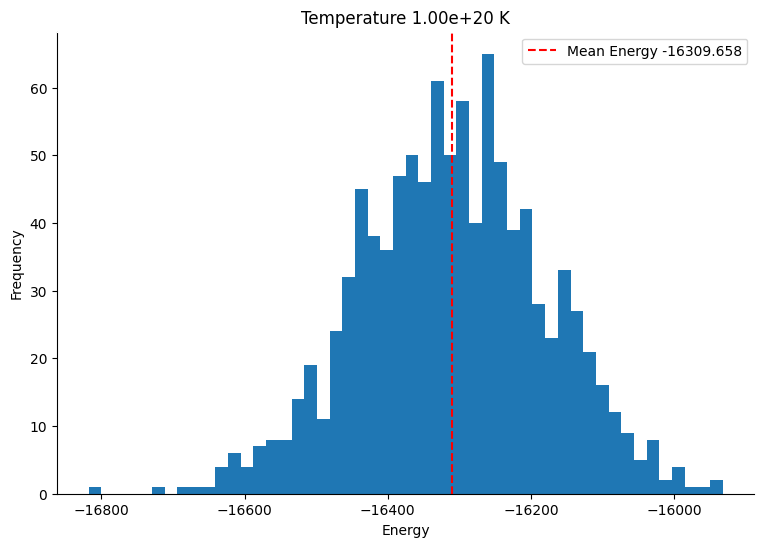

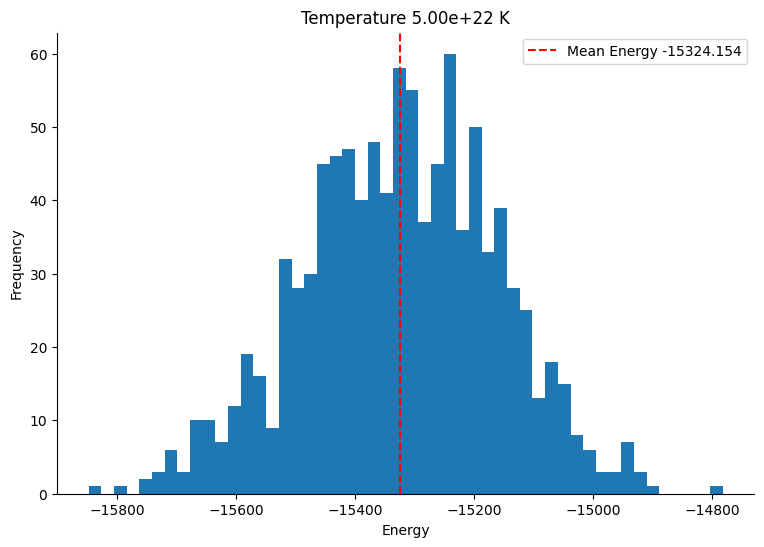

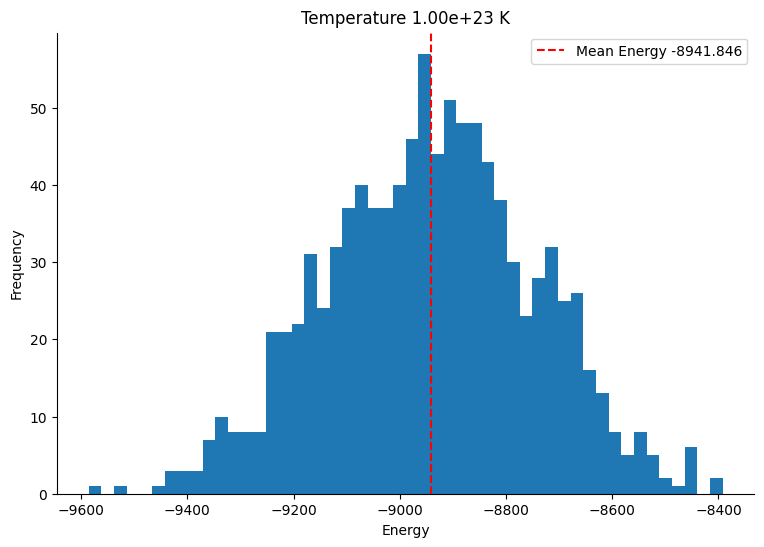

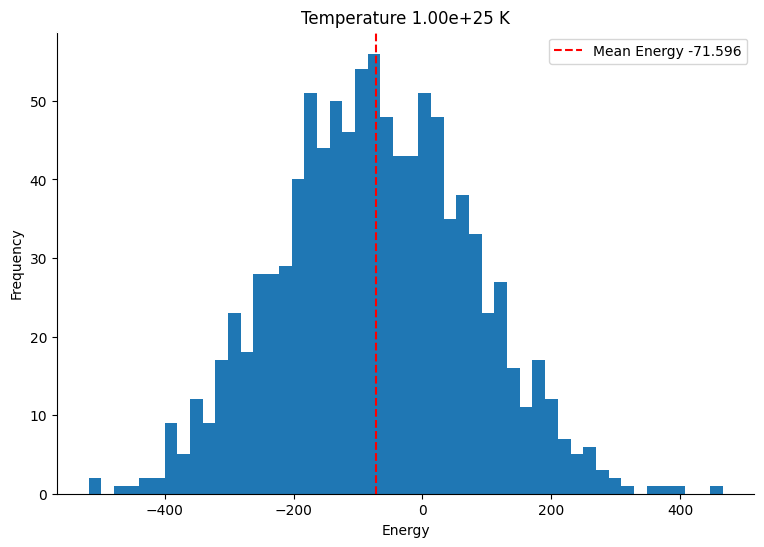

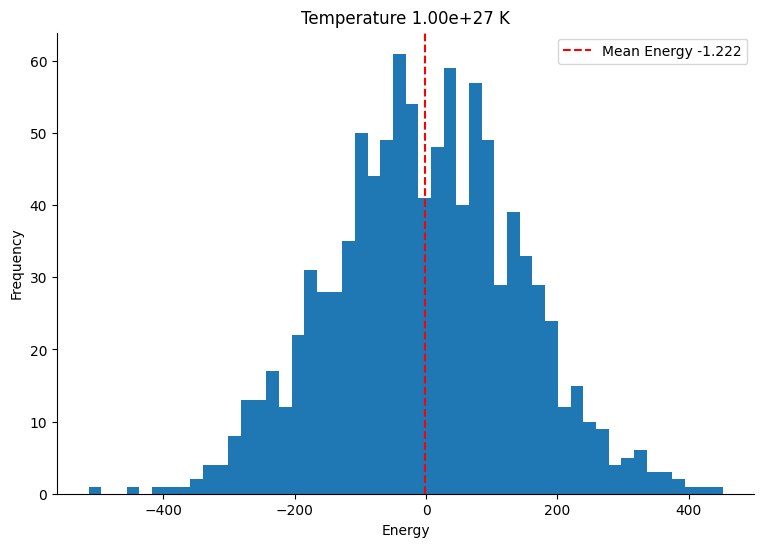

In [134]:
def plotEnergyHist(temperature, include_mean=True, title=True):

    fig, ax = plt.subplots(figsize=(9, 6))

    #Pull dataframe from results dictionary
    df = data[temperature]

    ax.hist(df["energy"], bins=50)

    if title:
        #Show the temperature of the simulation
        ax.set_title(f"Temperature %s K" % "{:.2e}".format(temperature))

    ax.set_xlabel("Energy")
    ax.set_ylabel("Frequency")
    ax.spines['top'].set_color('#FFFFFF')
    ax.spines['right'].set_color('#FFFFFF')

    if include_mean:
        #Plot vertical line showing mean of distribution
        ax.axvline(df["energy"].mean(), color="red", linestyle="dashed", label=f"Mean Energy %s" % df["energy"].mean())
        ax.legend(loc="upper right")

    return fig, ax

plotEnergyHist(1e20)
plotEnergyHist(5e22)
plotEnergyHist(1e23)
plotEnergyHist(1e25)
plotEnergyHist(1e27)




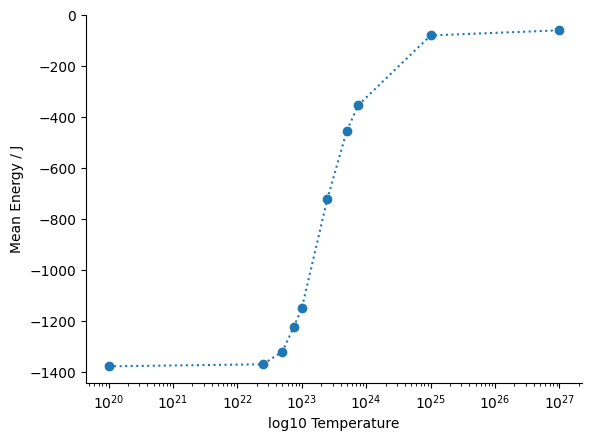

In [80]:
fig, ax = plt.subplots()

mean_energies = []

for temp in data.keys():
    mean_energies.append(data[temp]["energy"].mean())

ax.scatter(data.keys(), mean_energies)
ax.plot(data.keys(), mean_energies, ls="dotted")

ax.set_ylabel("Mean Energy / J")
ax.set_xlabel("log10 Temperature")
ax.set_xscale("log")
ax.spines['top'].set_color('#FFFFFF')
ax.spines['right'].set_color('#FFFFFF')
fig.savefig("images/Mean_Energy_Vs_Temperature_2D.png")